In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ad37e6af-7d2b-eb5b-5079-8c9e5c7cfa12)


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
train_path="/content/drive/MyDrive/spectrograms_train_files/"

with open(f"{train_path}X_train.npy", "rb") as f:
  X_train = np.load(f)

with open(f"{train_path}y_train.npy", "rb") as f:
  y_train = np.load(f)

with open(f"{train_path}X_test.npy", "rb") as f:
  X_test = np.load(f)

with open(f"{train_path}y_test.npy", "rb") as f:
  y_test = np.load(f)

with open(f"{train_path}X_val.npy", "rb") as f:
  X_val = np.load(f)
  
with open(f"{train_path}y_val.npy", "rb") as f:
  y_val = np.load(f)

In [85]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

In [86]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
results_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
164/164 [==============================] - 2s 7ms/step - loss: 1.7380 - accuracy: 0.3736 - val_loss: 1.2363 - val_accuracy: 0.6005
Epoch 2/20
164/164 [==============================] - 1s 6ms/step - loss: 1.2189 - accuracy: 0.5790 - val_loss: 0.9874 - val_accuracy: 0.6348
Epoch 3/20
164/164 [==============================] - 1s 6ms/step - loss: 0.9974 - accuracy: 0.6575 - val_loss: 0.8664 - val_accuracy: 0.6875
Epoch 4/20
164/164 [==============================] - 1s 6ms/step - loss: 0.8300 - accuracy: 0.7132 - val_loss: 0.7546 - val_accuracy: 0.7567
Epoch 5/20
164/164 [==============================] - 1s 6ms/step - loss: 0.7411 - accuracy: 0.7455 - val_loss: 0.6499 - val_accuracy: 0.7888
Epoch 6/20
164/164 [==============================] - 1s 6ms/step - loss: 0.6252 - accuracy: 0.7931 - val_loss: 0.6050 - val_accuracy: 0.7991
Epoch 7/20
164/164 [==============================] - 1s 5ms/step - loss: 0.5644 - accuracy: 0.8024 - val_loss: 0.5653 - val_accuracy: 0.8168
Epoch 

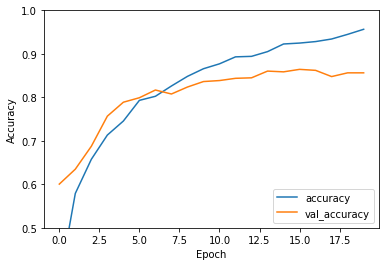

In [88]:
plt.plot(results_history.history['accuracy'], label='accuracy')
plt.plot(results_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [89]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

55/55 - 0s - loss: 0.6208 - accuracy: 0.8529 - 161ms/epoch - 3ms/step
